# **NLP Assignment 1** - ***IMDB Dataset of 50K Movie Reviews***

***Name - Saharsh Mehrotra PRN - 22070126093 AIML B1***
_________________________________________________________________


IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

*Import necessary libraries*

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import spacy

# Load dataset
df = pd.read_csv('/content/IMDB Dataset.csv')


*Preprocessing the text*

In [ ]:
# Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Removing symbols and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Tokenization and Lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text.lower() not in stop_words and token.is_alpha]
    return ' '.join(tokens)

df['review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Dataset Splitting*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

*Vectorization using Count Vectorizer and TFIDF Vectorizer*

In [ ]:
# Vectorization
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

*Train Machine Learning Models Train Logistic Regression, SVC and Random Forest models using both CountVectorizer and TF-IDFVectorizer features*


*Evaluate the models using classification report and confusion matrix*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- LogisticRegression with CountVectorizer ---
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



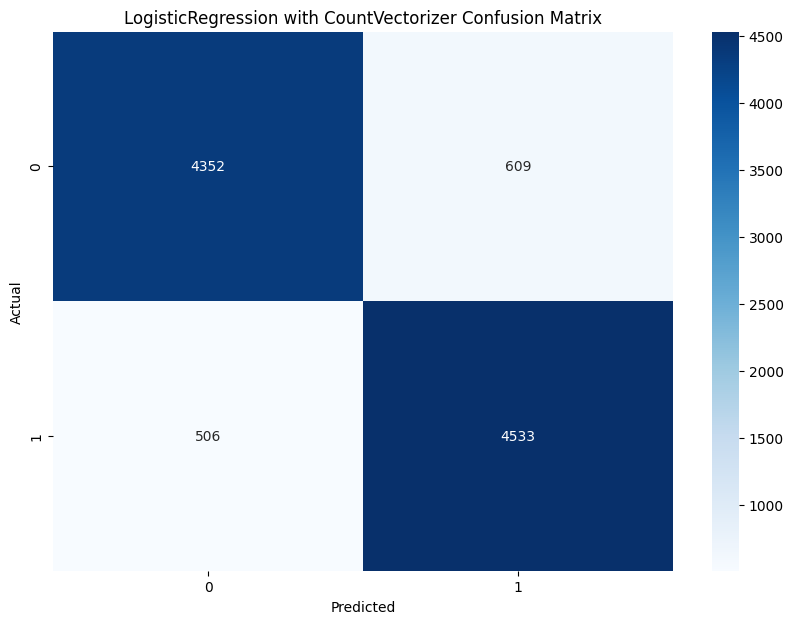

--- SVC with CountVectorizer ---
              precision    recall  f1-score   support

    negative       0.90      0.85      0.88      4961
    positive       0.86      0.91      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



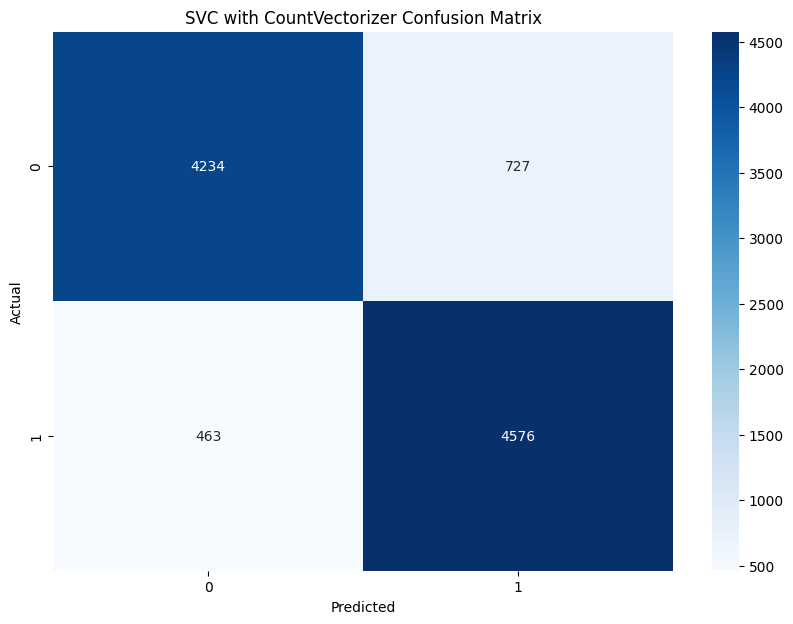

--- RandomForestClassifier with CountVectorizer ---
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.86      0.86      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



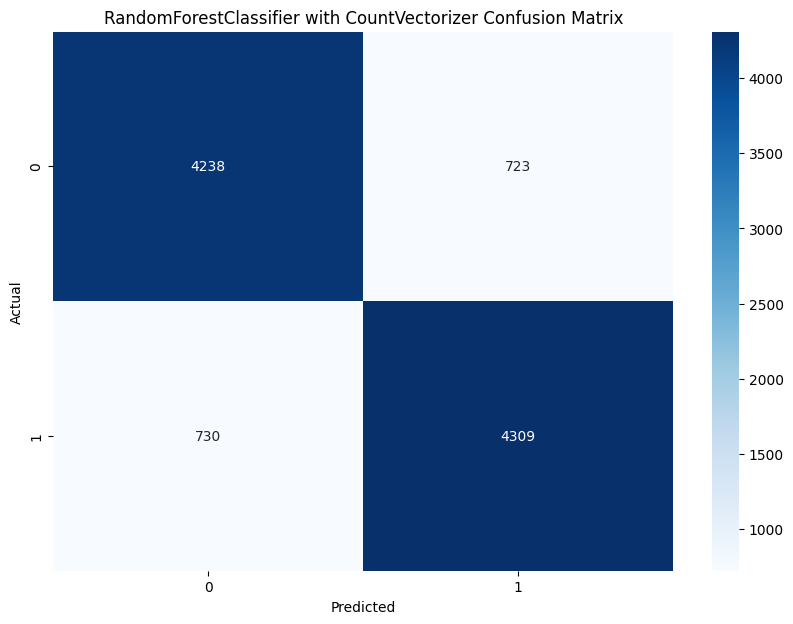

--- LogisticRegression with TFIDFVectorizer ---
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



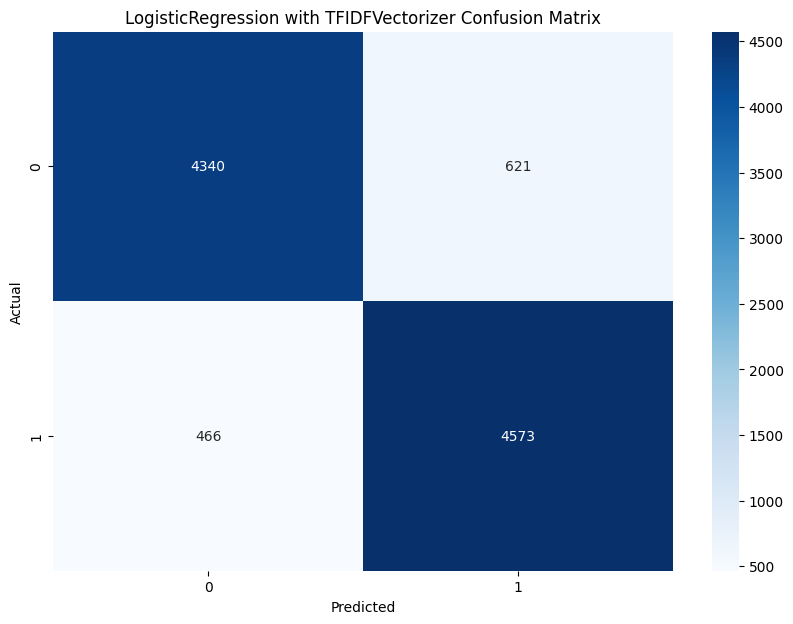

--- SVC with TFIDFVectorizer ---
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



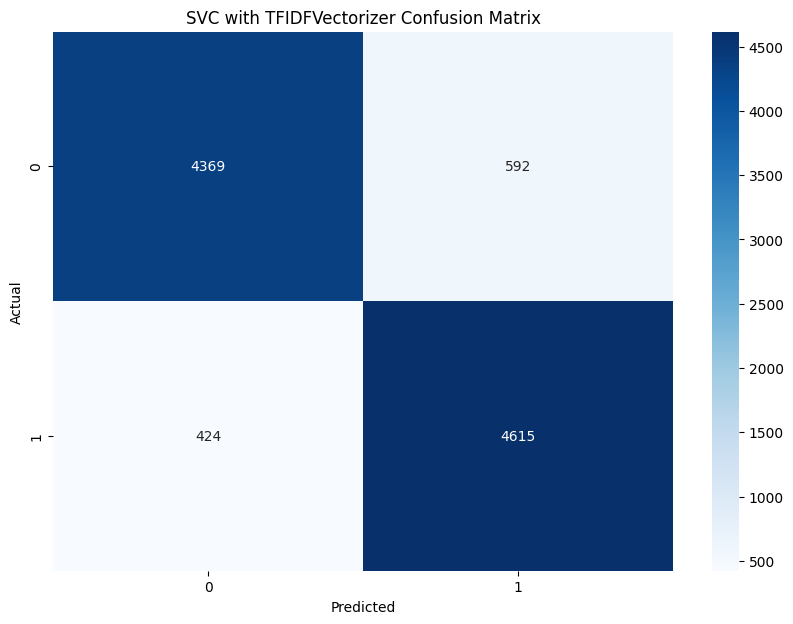

--- RandomForestClassifier with TFIDFVectorizer ---
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



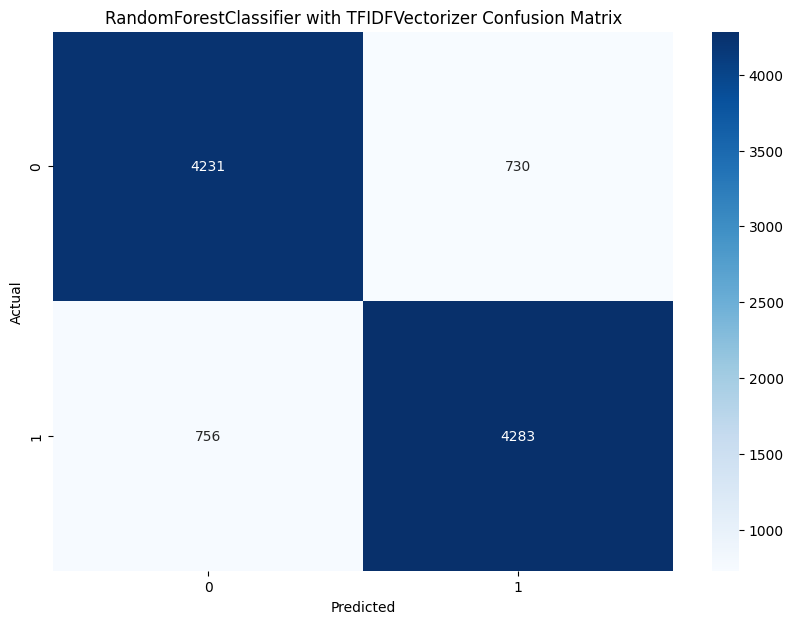

In [ ]:
# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, vectorizer_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {model.__class__.__name__} with {vectorizer_name} ---")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model.__class__.__name__} with {vectorizer_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate all models with CountVectorizer
for model_name, model in models.items():
    evaluate_model(model, X_train_count, X_test_count, y_train, y_test, 'CountVectorizer')

# Evaluate all models with TFIDFVectorizer
for model_name, model in models.items():
    evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test, 'TFIDFVectorizer')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Convert notebook to PDF
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/NLP Assignment 1 - 22070126093.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NLP Assignment 1 - 22070126093.ipynb to PDF
[NbConvertApp] Support files will be in NLP Assignment 1 - 22070126093_files/
[NbConvertApp] Making directory ./NLP Assignment 1 - 22070126093_files
[NbConvertApp] Making directory ./NLP Assignment 1 - 22070126093_files
[NbConvertApp] Making directory ./NLP Assignment 1 - 22070126093_files
[NbConvertApp] Making directory ./NLP Assignment 1 - 22070126093_files
[NbConvertApp] Making directory ./NLP Assignment 1 - 22070126093_files
[NbConvertApp] Making directory ./NLP Assi